In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
full_data = train_data.drop('Survived', 1)
full_data = full_data.append(test_data)
full_data.set_index('PassengerId', inplace=True)

print(full_data.shape)

full_data.head()

(1309, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Липсващи данни

Нека проверим дали всички данни са налични

In [5]:
def check_empty_values(data):
    return data.isnull().sum().sort_values()

check_empty_values(full_data)

Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
Age          263
Cabin       1014
dtype: int64

Нека попълним двете липсващи Embarked с S, който е най-популярния.

In [6]:
full_data.Embarked.fillna('S', inplace=True)

## Обработка на Age

Ще попълним липсващите стойност на база пол, класа и титла.

За целта ще създадем нова колона 'Title'.

In [7]:
# create title filed
def create_title(data):
    data['Title'] = data.Name.map(lambda name:name.split(',')[1].split('.')[0].strip())

    Title_Map = {
        "Capt":       "Staff",
        "Col":        "Staff",
        "Major":      "Staff",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "Dr":         "Staff",
        "Rev":        "Staff",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Mme":        "Mrs",
        "Mlle":       "Miss",
        "Ms":         "Mrs",
        "Mr" :        "Mr",
        "Mrs" :       "Mrs",
        "Miss" :      "Miss",
        "Master" :    "Master",
        "Lady" :      "Royalty"

    }
    data['Title'] = data.Title.map(Title_Map)
    
    return data


create_title(full_data)
full_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Да групураме и попълним данните, като разделим тренировъчния и тестовия сет.

In [8]:
def fill_missing_age(data):
    grouped_data = full_data.groupby(['Sex','Pclass','Title'])
    grouped_median = grouped_data.median()
    
    def fill_age(row):
        return grouped_median.loc[row['Sex'], row['Pclass'], row['Title']]['Age']
    
    return data.apply(lambda r : fill_age(r) if np.isnan(r['Age']) else r['Age'], axis=1)


full_data.head(891).Age = fill_missing_age(full_data.head(891))
full_data.iloc[891:].Age = fill_missing_age(full_data.iloc[891:])

In [9]:
check_empty_values(full_data)

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Title          0
Fare           1
Cabin       1014
dtype: int64

## Обработка на Fare

In [10]:
def fill_missing_fare(data):
    data.Fare.fillna(data.Fare.mean(), inplace=True)

fill_missing_fare(full_data.head(891))
fill_missing_fare(full_data.iloc[891:])

## Обработка на Cabin

In [11]:
def fill_missing_cabin(data):
    data.Cabin.fillna('Uknown',inplace=True)
    data['Cabin'] = data['Cabin'].map(lambda c : c[0])
    
fill_missing_cabin(full_data)

In [12]:
check_empty_values(full_data)

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64

## Още масажи и подготовка за класификация


In [13]:
def family_encoding(data):
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

    data['Alone'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if 5<=s else 0)

In [14]:
def ticket_cleaning(data):
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    
    data['Ticket'] = data['Ticket'].map(cleanTicket)

In [15]:
def supa_hot_encoding(data, col):
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies],axis=1)
    data.drop(col, axis=1, inplace=True)
    
    return data

In [16]:
def prepare(data):
    data = data.copy()
    # remove Name
    data.drop('Name',axis=1,inplace=True)
    
    # encode Title
    data = supa_hot_encoding(data, 'Title')
    
    # encode Embarked
    data = supa_hot_encoding(data, 'Embarked')
    
    # encode Pclass
    data = supa_hot_encoding(data, 'Pclass')
    
    # encode Cabin
    data = supa_hot_encoding(data, 'Cabin')
    
    # encode Sex
    data.Sex = data.Sex.map({'male':1,'female':0})
    
    family_encoding(data)
    
    ticket_cleaning(data)
    data = supa_hot_encoding(data, 'Ticket')
    
    return data
    
ready_data = prepare(full_data)
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 67 columns):
Sex               1309 non-null int64
Age               1309 non-null float64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Fare              1309 non-null float64
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_Mrs         1309 non-null uint8
Title_Royalty     1309 non-null uint8
Title_Staff       1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
Pclass_1          1309 non-null uint8
Pclass_2          1309 non-null uint8
Pclass_3          1309 non-null uint8
Cabin_A           1309 non-null uint8
Cabin_B           1309 non-null uint8
Cabin_C           1309 non-null uint8
Cabin_D           1309 non-null uint8
Cabin_E           1309 non-null uint8
Cabin_F           1309 non-null uint8
Cabin_G        

In [17]:
ready_data.shape

(1309, 67)

## Feature selection

След като генерирахме 67 feature-a ще използвам ExtraTreesClassifier и SelectFromModel за да избера най-подходящите от тях.

In [18]:
labels = train_data.Survived
train = ready_data.head(891)
test = ready_data.iloc[891:]

train.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, labels)

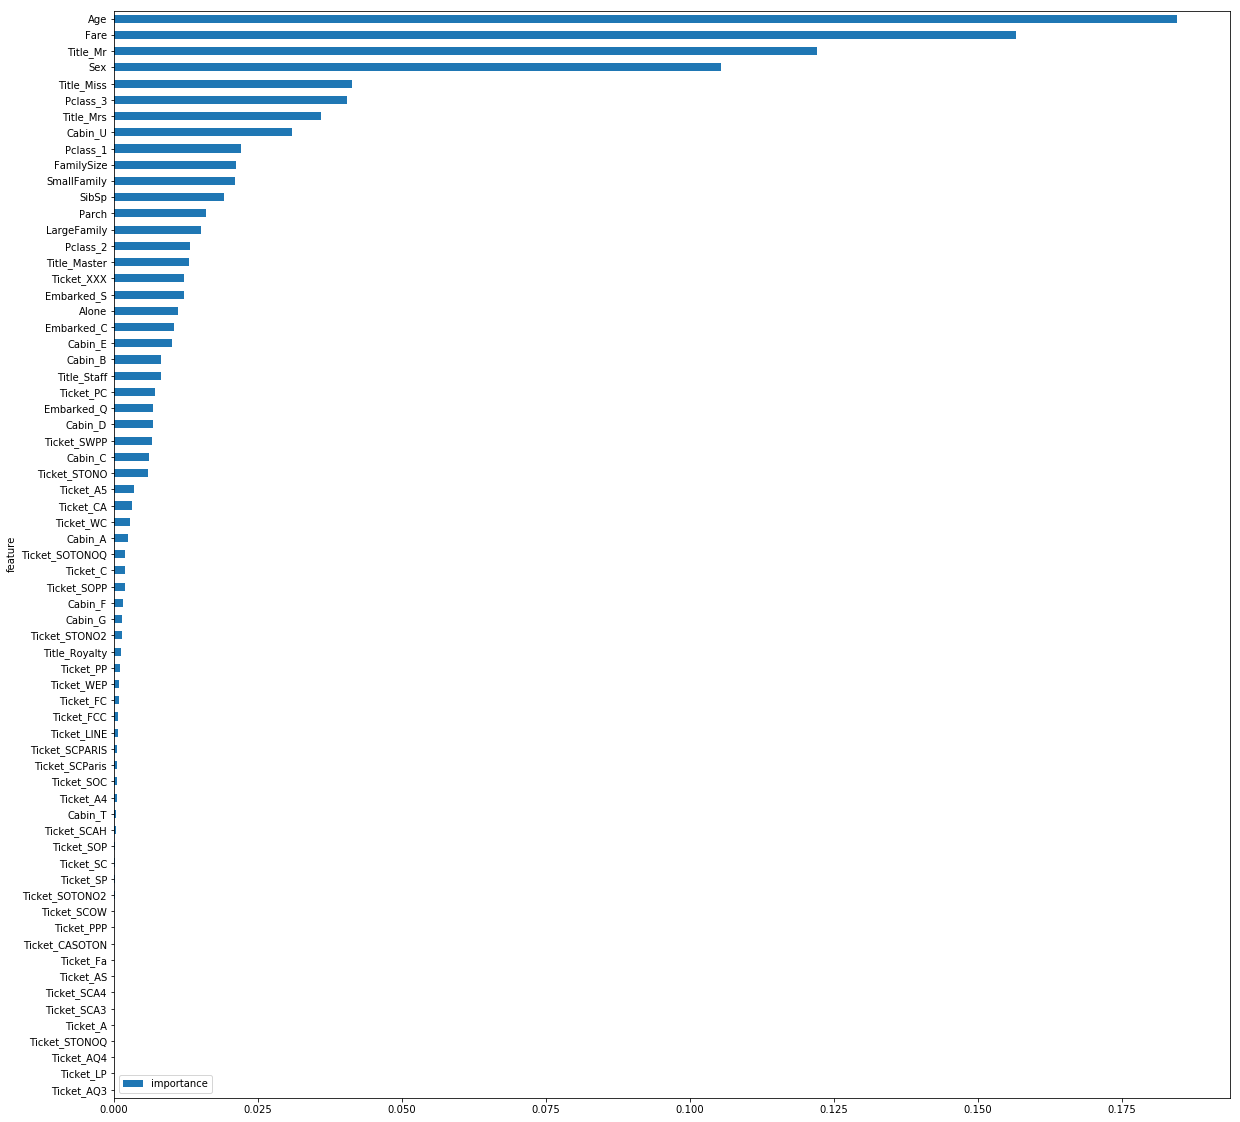

In [20]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [21]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 14)

In [22]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 14)

SelectFromModel филтрира 14 feature-а, с които ще тренирам своя модел.

## Hyperparameters tuning

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(labels, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_reduced, labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8327721661054994
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 210}


In [24]:
parameters = {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 240}

model = RandomForestClassifier(**parameters)
model.fit(train_reduced, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=240, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
output = model.predict(test_reduced).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test_data['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('data/output.csv',index=False)

![supa_hot.gif](http://i3.kym-cdn.com/photos/images/newsfeed/000/276/747/bf9.gif)